## Observations and Insights 

Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

1. Capomulin and Ramicane have the lowest final tumor volumes according to the box whisker plots.  An assumption can be made that these are the most effective regimens.
2. Ketapril has the highest variance in tumor volume.  This means that the data points are more spread out for this regimen
3. The calculation of 0.84 indicates there is a strong positive correlation between tumor volume and weight of the mouse for the Capomulin regimen

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_metadata["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
# Optional: Get all the data for the duplicate mouse ID. 
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = merge_df[merge_df["Mouse ID"] != "g989"]
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data["Mouse ID"].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_mouse = clean_mouse_data.groupby(["Drug Regimen"])

summary = pd.DataFrame({"Mean Tumor Volume":grouped_mouse["Tumor Volume (mm3)"].mean(), 
                        "Mean Tumor Volume": grouped_mouse["Tumor Volume (mm3)"].median(), 
                        "Tumor Volume Variance": grouped_mouse["Tumor Volume (mm3)"].var(), 
                        "Tumor Volume Std. Dev.": grouped_mouse["Tumor Volume (mm3)"].std(), 
                        "Tumor Volume Std. Err.": grouped_mouse["Tumor Volume (mm3)"].sem()})
summary



,Mean Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,
Capomulin,41.557809,24.947764,4.994774,0.329346
Ceftamin,51.776157,39.290177,6.268188,0.469821
Infubinol,51.820584,43.128684,6.567243,0.492236
Ketapril,53.698743,68.553577,8.279709,0.603860
Naftisol,52.509285,66.173479,8.134708,0.596466
Placebo,52.288934,61.168083,7.821003,0.581331
Propriva,50.446266,43.852013,6.622085,0.544332
Ramicane,40.673236,23.486704,4.846308,0.320955
Stelasyn,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_stats = pd.DataFrame(grouped_mouse.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}))
summary_agg_stats




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Measurements')

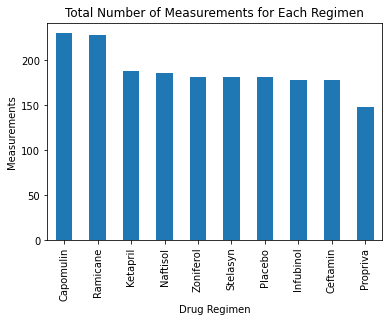

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_data = grouped_mouse["Mouse ID"].count()
bar_data = bar_data.sort_values(ascending = False)
bar_graph = bar_data.plot.bar(title='Total Number of Measurements for Each Regimen')
bar_graph.set_ylabel("Measurements")

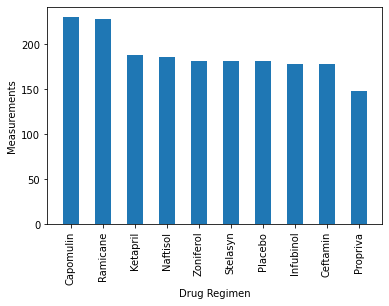

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = bar_data.keys()
plt.bar(x_axis, bar_data, width = .5)
plt.xticks(rotation="vertical")
plt.ylabel("Measurements")
plt.xlabel("Drug Regimen")
plt.show()


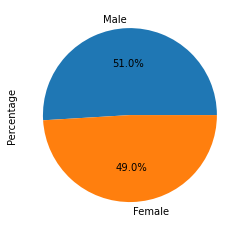

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data = clean_mouse_data.groupby("Sex").count()
pie_data = pie_data.sort_values("Mouse ID", ascending = False)
sum_mouse = pie_data["Mouse ID"].sum()
pie_data["Percentage"] = (pie_data["Mouse ID"]/sum_mouse)*100
pie_data = pie_data[["Mouse ID", "Percentage"]]
pie_data.plot.pie(y="Percentage", autopct="%1.1f%%", legend = False)

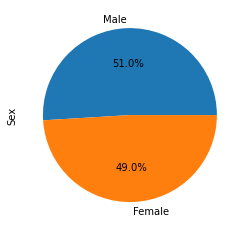

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = pie_data["Percentage"]
plt.pie(sizes, labels=pie_data.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
group_by_mouse = clean_mouse_data.groupby(["Mouse ID"])

# Start by getting the last (greatest) timepoint for each mouse
timepoint = pd.DataFrame(group_by_mouse["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
subset = pd.merge(timepoint, clean_mouse_data, on=["Mouse ID", "Timepoint"])
subset = subset.loc[subset["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
subset = subset[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

In [21]:
# Put treatments into a list for for loop (and later for plot labels)
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_Capomulin = subset.loc[subset["Drug Regimen"] == "Capomulin"]
# Create empty list to fill with tumor vol data (for plotting)
capomulin_data = tumor_Capomulin["Tumor Volume (mm3)"].tolist()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_Capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Determine outliers using upper and lower bounds
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
   

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [14]:
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_Ramicane = subset.loc[subset["Drug Regimen"] == "Ramicane"]
# Create empty list to fill with tumor vol data (for plotting)
ramicane_data = tumor_Ramicane["Tumor Volume (mm3)"].tolist()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_Ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Determine outliers using upper and lower bounds
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [15]:
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_Infubinol = subset.loc[subset["Drug Regimen"] == "Infubinol"]
# Create empty list to fill with tumor vol data (for plotting)
infubinol_data = tumor_Infubinol["Tumor Volume (mm3)"].tolist()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_Infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Determine outliers using upper and lower bounds
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [16]:
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_Ceftamin = subset.loc[subset["Drug Regimen"] == "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
ceftamin_data = tumor_Ceftamin["Tumor Volume (mm3)"].tolist()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_Ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Determine outliers using upper and lower bounds
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


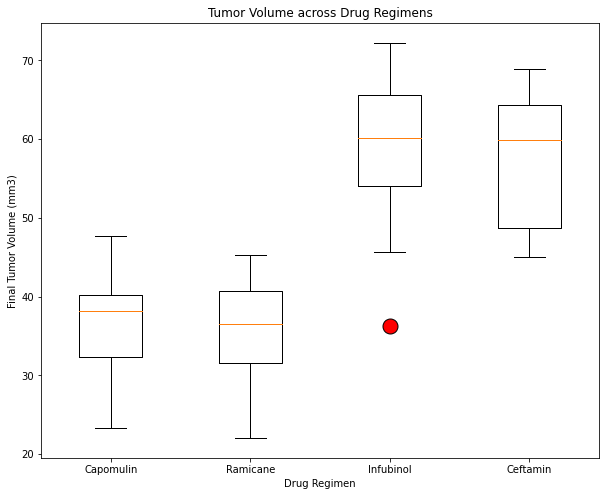

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Creating dataset
data = [capomulin_data, ramicane_data, infubinol_data, ceftamin_data]
red_circle = dict(markerfacecolor='r', marker='o', markersize=15)
fig1, ax1 = plt.subplots(figsize=(10, 8))
# Creating plot 
 
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Tumor Volume across Drug Regimens')
ax1.boxplot(data, labels=labels, flierprops=red_circle)  
# show plot 
plt.show() 

## Line and Scatter Plots

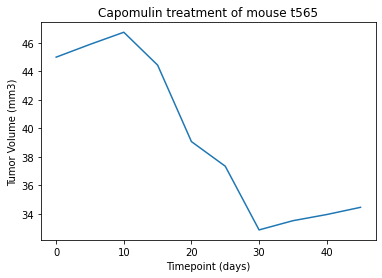

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_single_mouse = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "t565"]
capomulin_single_mouse = capomulin_single_mouse[["Tumor Volume (mm3)", "Timepoint"]]
yaxis=capomulin_single_mouse["Timepoint"].tolist()
xaxis=capomulin_single_mouse["Tumor Volume (mm3)"].tolist()
capomulin_single_mouse.head()
plt.title("Capomulin treatment of mouse t565")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.plot(yaxis,xaxis)

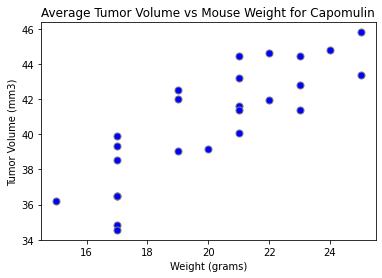

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_capomulin = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin"]
scatter_capomulin = scatter_capomulin.groupby("Mouse ID").mean()
weights = scatter_capomulin["Weight (g)"]
mean_tumors = scatter_capomulin["Tumor Volume (mm3)"]
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (grams)")
plt.scatter(weights, mean_tumors, marker="o", facecolors="blue", edgecolors="grey", s=50)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


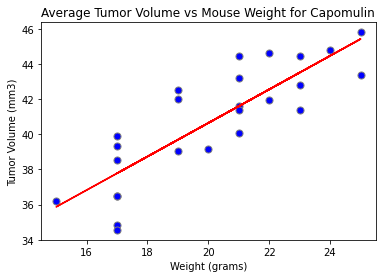

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, mean_tumors)
regress_values = weights * slope + intercept
print(f"The correlation between mouse weight and the average tumor volume is {rvalue:.2}")
plt.plot(weights,regress_values,"r-")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (grams)")
plt.scatter(weights, mean_tumors, marker="o", facecolors="blue", edgecolors="grey", s=50)